# Deep Learning CIFAR10 Image Classifier

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
# Import data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (50000, 32, 32, 3)
Training Data Labels Shape: (50000, 1)


In [4]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

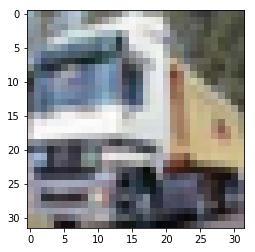

In [5]:
plt.imshow(X_train[1,:,:])

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [7]:
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [9]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
# model.add(Conv2D(64, (5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(1000, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))

In [10]:
# Compile the model using categorical crossentropy for the loss function, the adam optimizer,
# and add accuracy to the training metrics
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [11]:
# Use the training data to fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=128,
    shuffle=True,
    verbose=2
)

Epoch 1/25
146s - loss: 1.6298 - acc: 0.4033
Epoch 2/25
146s - loss: 1.2299 - acc: 0.5597
Epoch 3/25
147s - loss: 1.0612 - acc: 0.6264
Epoch 4/25
147s - loss: 0.9564 - acc: 0.6631
Epoch 5/25
148s - loss: 0.8590 - acc: 0.7006
Epoch 6/25
148s - loss: 0.8005 - acc: 0.7218
Epoch 7/25
148s - loss: 0.7493 - acc: 0.7387
Epoch 8/25
148s - loss: 0.7097 - acc: 0.7502
Epoch 9/25
149s - loss: 0.6668 - acc: 0.7640
Epoch 10/25
149s - loss: 0.6395 - acc: 0.7764
Epoch 11/25
149s - loss: 0.6162 - acc: 0.7844
Epoch 12/25
149s - loss: 0.5884 - acc: 0.7924
Epoch 13/25
149s - loss: 0.5675 - acc: 0.7974
Epoch 14/25
149s - loss: 0.5433 - acc: 0.8060
Epoch 15/25
150s - loss: 0.5219 - acc: 0.8141
Epoch 16/25
150s - loss: 0.5094 - acc: 0.8185
Epoch 17/25
149s - loss: 0.4899 - acc: 0.8281
Epoch 18/25
149s - loss: 0.4767 - acc: 0.8276
Epoch 19/25
149s - loss: 0.4573 - acc: 0.8381
Epoch 20/25
148s - loss: 0.4459 - acc: 0.8410
Epoch 21/25
149s - loss: 0.4460 - acc: 0.8419
Epoch 22/25
149s - loss: 0.4231 - acc: 0.84

In [12]:
# Save the model
model.save("cifar10_trained.h5")

In [13]:
# Load the model
from keras.models import load_model
model = load_model("cifar10_trained.h5")

In [14]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Loss: 0.5992375843524933, Accuracy: 0.8034


In [15]:
# Grab just one data point to test with
test = np.expand_dims(X_train[1], axis=0)
test.shape

(1, 32, 32, 3)

In [16]:
# Make a prediction. The result should be 0000010000000 for a 5 - STANDING
model.predict(test).round()

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)